# Importing the data-set from its folder
    - Collecting the images and labels in two arrays

In [17]:
import os
from PIL import Image

def load_images(folder):
    images = []
    labels = []
    for class_folder_name in os.listdir(folder):
        class_folder_path = os.path.join(folder, class_folder_name)
        if os.path.isdir(class_folder_path):
            for filename in os.listdir(class_folder_path):
                img = Image.open(os.path.join(class_folder_path, filename))
                if img is not None:
                    images.append(img)
                    labels.append(int(class_folder_name[-1]))  
    return images, labels

images, labels = load_images(r"Desktop\cifar-3class-data\cifar-3class-data\train")
print(len(labels))



1500


# Displaying any 4 images to check the data-set

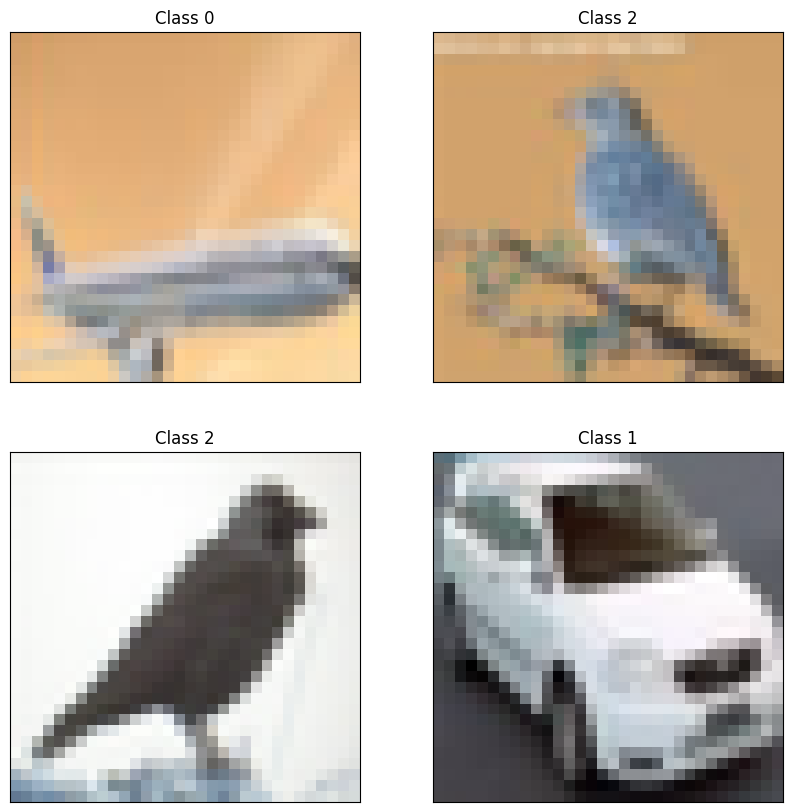

In [18]:
import matplotlib.pyplot as plt
import random
fig = plt.figure(figsize=(10, 10))

for i in range(4):
    random_index = random.randint(0,1499)
    plt.subplot(2, 2, i + 1, title=f"Class {labels[random_index]}")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[random_index])
plt.show()

# Splitting the training-data into training set and validation set using sklearn

In [19]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.1, stratify=labels, random_state=42)
print("Length of training set is :", len(train_labels))
print("Length of validation set is :", len(val_labels))

Length of training set is : 1350
Length of validation set is : 150


# Converting the images to vectors and Normalising the vectors

In [20]:
def convert_images_to_vectors(images):
    vectorized_images = []
    for img in images:
        # Convert the image to grayscale if it's not already
        if img.mode != 'L':
            img = img.convert('L')
        # Resize the image to 32x32 if it's not already
        if img.size != (32, 32):
            img = img.resize((32, 32))
        # Convert the image data to a vector
        vector = []
        for pixel in img.getdata():
            vector.append(pixel)
        vectorized_images.append(vector)
    return vectorized_images

# Convert the training images to vectors
train_vectors = convert_images_to_vectors(train_images)

# Convert the validation images to vectors
val_vectors = convert_images_to_vectors(val_images)

print(val_vectors[0])

[87, 89, 93, 100, 101, 100, 97, 94, 90, 88, 89, 91, 91, 90, 91, 91, 89, 86, 83, 81, 83, 85, 87, 86, 82, 76, 70, 62, 58, 56, 56, 53, 94, 97, 100, 105, 106, 105, 105, 102, 98, 97, 97, 97, 97, 98, 100, 100, 98, 95, 90, 88, 89, 91, 94, 94, 91, 88, 85, 78, 73, 71, 68, 62, 99, 102, 105, 110, 115, 114, 113, 113, 109, 108, 108, 108, 108, 109, 110, 111, 108, 106, 102, 100, 101, 102, 108, 109, 105, 105, 104, 97, 93, 90, 86, 79, 97, 103, 108, 115, 120, 121, 121, 121, 119, 118, 117, 117, 116, 120, 127, 136, 140, 137, 135, 129, 124, 128, 128, 120, 117, 117, 116, 108, 103, 99, 98, 92, 94, 100, 107, 114, 118, 122, 124, 125, 126, 123, 125, 126, 142, 178, 206, 225, 235, 233, 231, 221, 214, 212, 177, 138, 126, 123, 119, 116, 114, 109, 106, 97, 88, 96, 102, 109, 116, 120, 125, 133, 142, 151, 155, 171, 203, 215, 204, 197, 204, 217, 223, 226, 226, 236, 236, 216, 167, 126, 118, 117, 117, 114, 108, 101, 83, 88, 96, 124, 158, 170, 171, 170, 162, 170, 207, 203, 177, 151, 117, 91, 100, 112, 123, 136, 138, 163, 

In [21]:
def normalize_vectors(vectors):
    normalized_vectors = []
    for vector in vectors:
        normalized_vector = [pixel / 255.0 for pixel in vector]
        normalized_vectors.append(normalized_vector)
    return normalized_vectors

# Normalize the training vectors
train_vectors = normalize_vectors(train_vectors)

# Normalize the validation vectors
val_vectors = normalize_vectors(val_vectors)
print(val_vectors[0])

[0.3411764705882353, 0.34901960784313724, 0.36470588235294116, 0.39215686274509803, 0.396078431372549, 0.39215686274509803, 0.3803921568627451, 0.3686274509803922, 0.35294117647058826, 0.34509803921568627, 0.34901960784313724, 0.3568627450980392, 0.3568627450980392, 0.35294117647058826, 0.3568627450980392, 0.3568627450980392, 0.34901960784313724, 0.33725490196078434, 0.3254901960784314, 0.3176470588235294, 0.3254901960784314, 0.3333333333333333, 0.3411764705882353, 0.33725490196078434, 0.3215686274509804, 0.2980392156862745, 0.27450980392156865, 0.24313725490196078, 0.22745098039215686, 0.2196078431372549, 0.2196078431372549, 0.20784313725490197, 0.3686274509803922, 0.3803921568627451, 0.39215686274509803, 0.4117647058823529, 0.41568627450980394, 0.4117647058823529, 0.4117647058823529, 0.4, 0.3843137254901961, 0.3803921568627451, 0.3803921568627451, 0.3803921568627451, 0.3803921568627451, 0.3843137254901961, 0.39215686274509803, 0.39215686274509803, 0.3843137254901961, 0.37254901960784

# Creating the FCNN model as per the specified architecture
    - Three hidden layers having 256, 128, and 64 neurons, respectively (The activation function for the hidden layers is “relu”).

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
# Assuming there are 3 classes in the output
num_classes = 3
model = Sequential()

# Add the first hidden layer with 256 neurons
model.add(Dense(256, activation='relu', input_shape=(1024,)))

# Add the second hidden layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Add the third hidden layer with 64 neurons
model.add(Dense(64, activation='relu'))

# Add the output layer with 'num_classes' neurons
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
model.summary()


C:\Users\aadit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,747 (1.16 MB)

 Trainable params: 303,747 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model for 500 epochs and a batch size of 200
    - The loss-function is chosen as categorical_crossentropy
    - Optimization function 'Adam' is chosen 

In [23]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert lists to numpy arrays
train_vectors = np.array(train_vectors)
val_vectors = np.array(val_vectors)

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
val_labels_one_hot = to_categorical(val_labels)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now, train the model
history = model.fit(
    x=train_vectors, 
    y=train_labels_one_hot, 
    batch_size=200, 
    epochs = 500, 
    validation_data=(val_vectors, val_labels_one_hot)
)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.3945 - loss: 1.1637 - val_accuracy: 0.4933 - val_loss: 1.0189
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4935 - loss: 1.0139 - val_accuracy: 0.4800 - val_loss: 1.0078
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4928 - loss: 0.9724 - val_accuracy: 0.5333 - val_loss: 0.9670
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5176 - loss: 0.9486 - val_accuracy: 0.5800 - val_loss: 0.8934
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5623 - loss: 0.8879 - val_accuracy: 0.5400 - val_loss: 0.9013
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5933 - loss: 0.8672 - val_accuracy: 0.5933 - val_loss: 0.8575
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6260 - loss: 0.8244 - val_accuracy: 0.6133 - val_loss: 0.8453
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6568 - loss: 0.8002 - val_accuracy: 0.5800 - val_loss

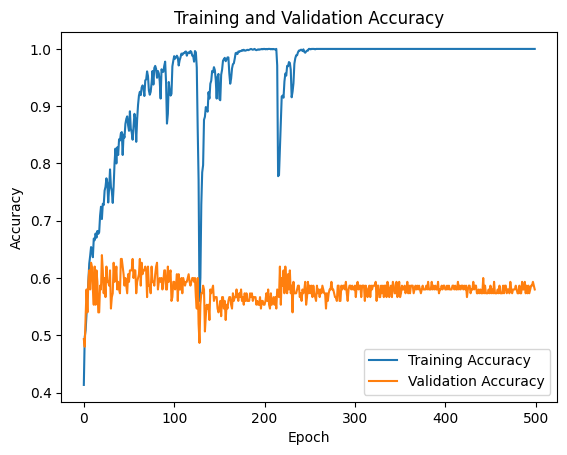

In [24]:
import matplotlib.pyplot as plt

# Get the history of the accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a new figure
plt.figure()

# Plot the training accuracy
plt.plot(acc, label='Training Accuracy')

# Plot the validation accuracy
plt.plot(val_acc, label='Validation Accuracy')

# Add a title
plt.title('Training and Validation Accuracy')

# Add x and y label
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.show()


# Applying the model on the test set

In [25]:
images_test, labels_test = load_images(r"Desktop\cifar-3class-data\cifar-3class-data\test")
# print(len(images_test))

In [26]:
test_vectors = convert_images_to_vectors(images_test)
print(test_vectors[0])
test_vectors = normalize_vectors(test_vectors)
print(test_vectors[0])

[154, 178, 183, 196, 189, 174, 175, 174, 177, 182, 186, 187, 187, 187, 184, 184, 181, 181, 185, 187, 188, 188, 189, 189, 187, 187, 188, 195, 199, 200, 205, 180, 155, 185, 192, 204, 199, 170, 164, 168, 167, 172, 177, 182, 176, 178, 169, 172, 177, 171, 173, 171, 174, 180, 176, 175, 176, 180, 197, 210, 211, 212, 217, 188, 154, 183, 191, 202, 207, 197, 183, 175, 168, 181, 195, 200, 199, 201, 194, 192, 200, 199, 198, 199, 200, 202, 197, 196, 197, 201, 210, 211, 210, 210, 216, 189, 157, 184, 192, 201, 207, 203, 193, 137, 120, 160, 163, 166, 170, 160, 159, 161, 176, 171, 173, 180, 178, 175, 178, 166, 196, 213, 209, 210, 211, 211, 217, 188, 158, 183, 189, 197, 203, 203, 197, 139, 142, 149, 120, 122, 128, 129, 127, 129, 133, 129, 129, 137, 132, 129, 144, 124, 172, 210, 206, 208, 211, 209, 217, 189, 155, 180, 190, 196, 201, 202, 192, 158, 180, 174, 153, 172, 175, 155, 158, 165, 184, 184, 181, 194, 182, 184, 191, 183, 202, 213, 212, 213, 213, 214, 220, 190, 155, 178, 187, 196, 198, 200, 161, 110,

In [27]:
# Convert lists to numpy arrays
test_vectors = np.array(test_vectors)
labels_test = np.array(labels_test)

# Convert labels to one-hot encoding
labels_test_one_hot = to_categorical(labels_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_vectors, labels_test_one_hot)

print('Test accuracy:', test_acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7089 - loss: 2.4750 
Test accuracy: 0.7166666388511658


# Classification using CNN

In [ ]:
#Importing the training data and splitting into training and validation sets

images, labels = load_images(r"Desktop\cifar-3class-data\cifar-3class-data\train")
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.1, stratify=labels, random_state=42)

def normalize_images(images):
    normalized_images = []
    for img in images:
        # Convert the image to an array
        img_array = np.array(img)
        # Normalize the image array and add it to the list
        normalized_images.append(img_array / 255.0)
    return normalized_images

# Normalize the training images
train_images = normalize_images(train_images)

# Normalize the validation images
val_images = normalize_images(val_images)
# print(train_images)


# Constructing the CNN Model as per the following architecture
    -Two consecutive convolutional layers each having 64 filters of size 3 X 3.
    - A maxpool layer to reduce the dimensions of the feature maps (output of the second convolution layer) to half.
    - Two consecutive convolutional layers each having 128 filters of size 3 X 3.
    - A maxpool layer to reduce the dimensions of the feature maps (output of the fourth convolution layer) to half.
    - A flattening layer to vectorise the feature tensor (a matrix of more than two dimensions).
    - Two fully connected layers having 512 and 100 neurons, respectively.
    - One fully connected layer serving as the output layer.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming there are 3 classes in the output
num_classes = 3

# Create a sequential model
model = Sequential()

# Add the first two convolutional layers with 64 filters of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the next two convolutional layers with 128 filters of size 3x3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flattening layer
model.add(Flatten())

# Add two fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='relu'))

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
model.summary()


C:\Users\aadit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,506,579 (17.19 MB)

 Trainable params: 4,506,579 (17.19 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling and training the model 

In [30]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
val_labels_one_hot = to_categorical(val_labels)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x=np.array(train_images), 
    y=train_labels_one_hot, 
    batch_size=200, 
    epochs=50, 
    validation_data=(np.array(val_images), val_labels_one_hot)
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3685 - loss: 1.1422 - val_accuracy: 0.3600 - val_loss: 1.0715
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 955ms/step - accuracy: 0.4020 - loss: 1.0561 - val_accuracy: 0.5333 - val_loss: 0.9138
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 969ms/step - accuracy: 0.6364 - loss: 0.8779 - val_accuracy: 0.6533 - val_loss: 0.8193
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 972ms/step - accuracy: 0.6364 - loss: 0.8136 - val_accuracy: 0.6467 - val_loss: 0.8751
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 977ms/step - accuracy: 0.7127 - loss: 0.8001 - val_accuracy: 0.6867 - val_loss: 0.7521
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 962ms/step - accuracy: 0.7168 - loss: 0.6961 - val_accuracy: 0.6400 - val_loss: 0.9250
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 965ms/step - accuracy: 0.7050 - loss: 0.7179 - val_accuracy: 0.6933 - val_loss: 0.6292
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 960ms/step - accuracy: 0.7520 - loss: 0.6021 - val_accuracy: 0.7333 - val_loss: 0

In [31]:
# Save the model
model.save('my_model.h5')


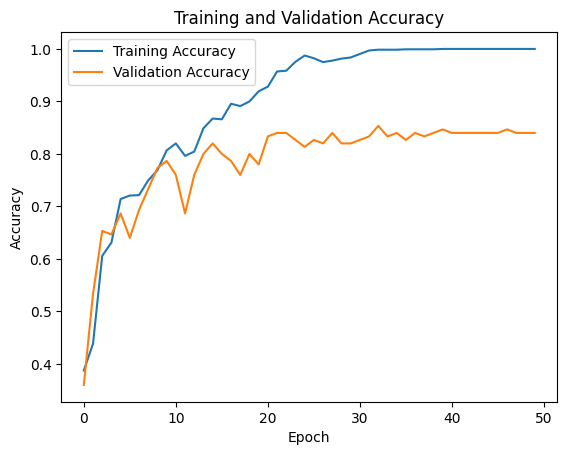

In [32]:
import matplotlib.pyplot as plt

# Get the history of the accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a new figure
plt.figure()

# Plot the training accuracy
plt.plot(acc, label='Training Accuracy')

# Plot the validation accuracy
plt.plot(val_acc, label='Validation Accuracy')

# Add a title
plt.title('Training and Validation Accuracy')

# Add x and y label
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.show()


# Applying the model on the test set

In [34]:
images_test, labels_test = load_images(r"Desktop\cifar-3class-data\cifar-3class-data\test")
test_images_normalized = normalize_images(images_test)
print(test_images_normalized)

[array([[[0.58431373, 0.61176471, 0.60784314],
        [0.73333333, 0.69019608, 0.65490196],
        [0.75686275, 0.70196078, 0.69019608],
        ...,
        [0.81960784, 0.76862745, 0.78823529],
        [0.83137255, 0.79215686, 0.79215686],
        [0.67058824, 0.71764706, 0.75294118]],

       [[0.61568627, 0.60784314, 0.6       ],
        [0.8       , 0.70196078, 0.63921569],
        [0.84313725, 0.72156863, 0.67058824],
        ...,
        [0.87058824, 0.81568627, 0.79215686],
        [0.89019608, 0.84313725, 0.79607843],
        [0.71764706, 0.74509804, 0.74117647]],

       [[0.6       , 0.60392157, 0.60784314],
        [0.78823529, 0.69803922, 0.62745098],
        [0.83529412, 0.7254902 , 0.65882353],
        ...,
        [0.84313725, 0.81568627, 0.80784314],
        [0.87843137, 0.84313725, 0.8       ],
        [0.72156863, 0.74901961, 0.74117647]],

       ...,

       [[0.24313725, 0.30980392, 0.34901961],
        [0.20392157, 0.20784314, 0.22352941],
        [0.23137255, 

In [35]:
from tensorflow.keras.models import load_model
test_images_normalized = np.array(test_images_normalized)
# Load the model
loaded_model = load_model('my_model.h5')
predictions = model.predict(test_images_normalized)

print(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step
[[9.99999881e-01 6.94796967e-08 3.17132674e-11]
 [9.98529434e-01 7.40962719e-07 1.46986253e-03]
 [9.99975324e-01 3.81183090e-16 2.46382660e-05]
 [1.85049412e-05 9.92737093e-09 9.99981523e-01]
 [1.00000000e+00 6.43843659e-11 4.74450576e-16]
 [7.25370347e-01 2.80995201e-03 2.71819681e-01]
 [9.98067915e-01 1.93214242e-03 1.99720035e-14]
 [9.99999523e-01 5.01933869e-07 9.10631026e-17]
 [9.92909729e-01 2.39202450e-07 7.08999857e-03]
 [1.10160373e-01 3.11710977e-07 8.89839351e-01]
 [1.00000000e+00 4.25725563e-13 4.70998825e-17]
 [9.99997377e-01 4.24809667e-12 2.61757168e-06]
 [1.47082592e-05 5.09863580e-03 9.94886696e-01]
 [9.81049061e-01 1.89408567e-02 1.00877505e-05]
 [9.99998450e-01 1.85987315e-12 1.49800758e-06]
 [9.99991179e-01 3.67439981e-07 8.40625671e-06]
 [9.99999881e-01 6.58376242e-09 1.52887068e-07]
 [7.01715646e-04 9.99269783e-01 2.85394326e-05]
 [6.26066267e-01 1.01035055e-10 3.73933733e-01]
 [9.68076468e-01 3.14660780e-02 4.57430637e-04]

In [36]:
image_class = np.argmax(predictions, axis=1)
print(image_class)

[0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0
 0 0 0 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 2 0 2 1 0 2 0 0 0 2 0 0 2 2 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 2 0 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 2 0 1 1 1 1 2 1 2 0 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2
 2 1 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2
 0 2 0 0 2 2 2 2 0 0 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


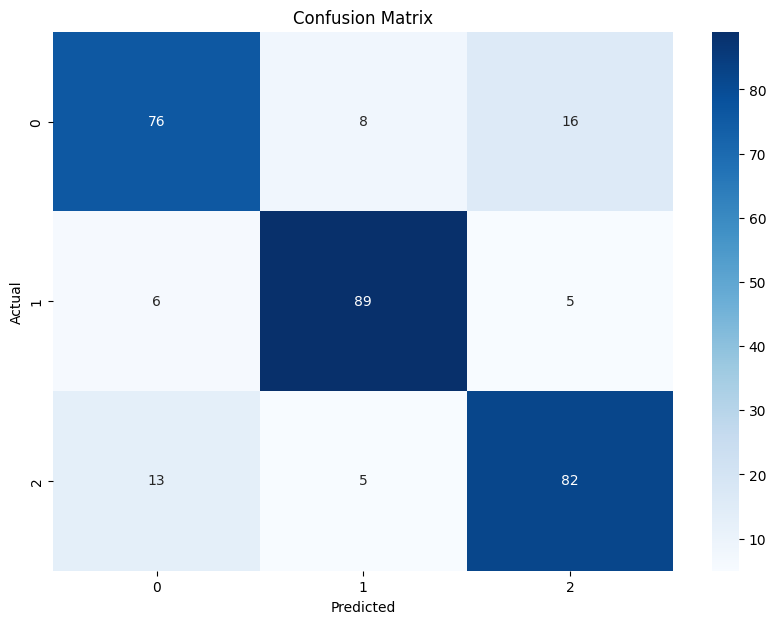

[[76  8 16]
 [ 6 89  5]
 [13  5 82]]


In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Assuming 'labels_test' is your actual class labels
actual_labels = labels_test

# Compute the confusion matrix
cm = confusion_matrix(actual_labels, image_class)


# Assuming 'cm' is your confusion matrix
# Create a new figure
plt.figure(figsize=(10,7))

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
# Add a title
plt.title('Confusion Matrix')

# Add x and y label
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()
print(cm)

In [39]:
# Assuming 'test_vectors' and 'labels_test' are your preprocessed test images and labels
test_vectors = np.array(test_images_normalized)
labels_test_one_hot = to_categorical(labels_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_vectors, labels_test_one_hot)

print('Test accuracy:', test_acc * 100)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.8068 - loss: 1.6057
Test accuracy: 82.33333230018616
